In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
country_press_df = pd.read_csv("Country_pressures.csv", delimiter=";", decimal=',') 
country_press_df.head()

,reporter_iso3,reporter_name,spam_name,prod,pct_change,value_change,harvest_area_2015,gwp,gwp_intensity,air_pollution,...,biodiversity_pct,land_degradation,land_degradation_intensity,land_degradation_pct,water_risk_blue,water_risk_green,water_risk_blue_intensity,water_risk_green_intensity,water_risk_blue_pct,water_risk_green_pct
0,AFG,Afghanistan,barley,91784.000000,-82.108382,-421216.000000,224035.3,303979.084900,3.311896,0.422893,...,16.037026,27287.6,0.297302,12.180045,1.314492e+08,3.738034e+07,2021.051449,1397.709708,98.204638,99.907770
1,AFG,Afghanistan,cotton,55780.000000,37.953208,15346.000000,41993.9,8665.012061,0.155343,0.011715,...,19.850026,10421.7,0.186836,24.817176,3.806276e+08,1.841415e+03,6824.240222,441.000000,99.638491,100.000000
2,AFG,Afghanistan,maize,155084.333300,-50.399467,-157582.333300,168396.4,129990.260100,0.838191,0.174950,...,11.234444,18220.8,0.117490,10.820184,6.607431e+08,7.098381e+06,4483.469910,920.530795,98.494506,99.624545
3,AFG,Afghanistan,millet,4398.666667,-58.456114,-6189.333333,6633.1,16110.865630,3.662670,0.021743,...,14.376385,1262.3,0.286973,19.030318,3.715732e+02,1.183367e+07,39.361032,2696.071301,69.054441,99.928514
4,AFG,Afghanistan,other oil crops,97765.333330,96.838990,48097.666670,4597.8,9452.970802,0.096690,0.012364,...,10.559398,685.5,0.007012,14.909304,1.450954e+08,1.805168e+08,8292.160418,2248.942584,100.000000,100.000000


In [3]:
#Take only relevant columns
country_press_df.columns
cn_pr_rel=country_press_df[['reporter_iso3', 'reporter_name','air_pollution','biodiversity_pct','land_degradation_pct']]
cn_pr_rel.head()

,reporter_iso3,reporter_name,air_pollution,biodiversity_pct,land_degradation_pct
0,AFG,Afghanistan,0.422893,16.037026,12.180045
1,AFG,Afghanistan,0.011715,19.850026,24.817176
2,AFG,Afghanistan,0.174950,11.234444,10.820184
3,AFG,Afghanistan,0.021743,14.376385,19.030318
4,AFG,Afghanistan,0.012364,10.559398,14.909304


In [4]:
#groupby country aggregates
cn_pr_means=cn_pr_rel.groupby('reporter_name').mean()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  #display full table
    display(cn_pr_means)

#Some countries have nan values. 

,air_pollution,biodiversity_pct,land_degradation_pct
reporter_name,,,
Afghanistan,4.393398e-01,16.517820,14.076394
Albania,5.738199e-02,0.031091,9.882099
Algeria,6.076392e-02,3.185549,8.650007
Angola,1.913169e-01,7.828543,28.956791
Antigua and Barbuda,5.375739e-04,67.606731,NaN
Argentina,2.920441e+00,11.412087,51.887409
Armenia,1.924452e-02,4.270337,1.758596
Australia,1.469250e+00,5.267032,33.688286
Austria,8.765220e-02,NaN,4.147648


In [5]:
#What does the percentage values for the biodiversity and land_deg mean?

cn_pr_means['biodiversity_pct'].sum()

2313.4714871781907

In [6]:
len(cn_pr_means)

198

In [7]:
cn_pr_means.describe().T

,count,mean,std,min,25%,50%,75%,max
air_pollution,186.0,0.585850,1.770391,4.047290e-07,0.025596,0.114163,0.297358,15.026351
biodiversity_pct,166.0,13.936575,20.300488,2.177894e-02,1.656183,5.854747,16.877279,100.000000
land_degradation_pct,170.0,19.761051,14.074634,1.622999e+00,10.923140,16.222575,25.844494,100.000000


In [8]:
cn_pr_means.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   air_pollution         186 non-null    float64
 1   biodiversity_pct      166 non-null    float64
 2   land_degradation_pct  170 non-null    float64
dtypes: float64(3)
memory usage: 6.2+ KB


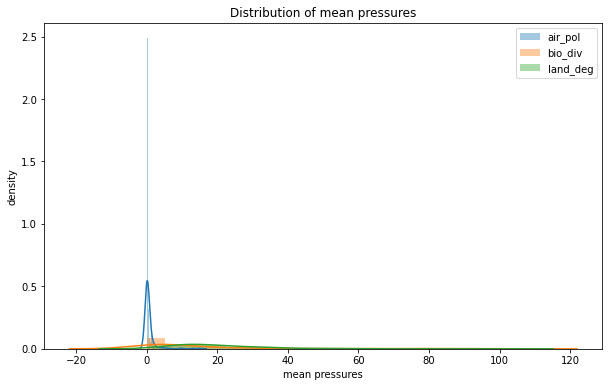

In [9]:
#Distribution of means 

plt.figure(figsize=(10,6))
sns.distplot(cn_pr_means['air_pollution'],hist=True, label='air_pol')
sns.distplot(cn_pr_means['biodiversity_pct'],hist=True, label = 'bio_div')
sns.distplot(cn_pr_means['land_degradation_pct'],hist=True, label='land_deg')
plt.legend()
plt.xlabel("mean pressures")
plt.ylabel("density")
plt.title("Distribution of mean pressures")
plt.show()

In [10]:
# max(cn_pr_means['air_pollution'])

In [11]:
#air pollution index 
cn_pr_dsc=pd.DataFrame(cn_pr_means['air_pollution'].dropna().sort_values(ascending=False))
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(cn_pr_dsc)
# plt.figure(figsize=(6,20))
# plt.xticks(rotation=90)
# sns.barplot(data=cn_pr_dsc.reset_index(), x='air_pollution',y='reporter_name', orient='h')

cn_pr_dsc['cum_sum']=cn_pr_dsc['air_pollution'].cumsum()
tot_ap=cn_pr_dsc['cum_sum'].iloc[-1] #total air pollution
cn_pr_dsc['cum_perc']=cn_pr_dsc['cum_sum']/tot_ap
# len(cn_pr_dsc) #Only non-null values considered



cn_pr_dsc['countries_cum_perc']= 1/len(cn_pr_dsc)
cn_pr_dsc['countries_cum_perc']=cn_pr_dsc['countries_cum_perc'].cumsum()

cn_pr_dsc.reset_index(inplace=True)
# cn_pr_dsc.rename(columns={"index": "Country"},inplace=True)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(cn_pr_dsc)

,reporter_name,air_pollution,cum_sum,cum_perc,countries_cum_perc
0,India,1.502635e+01,15.026351,0.137897,0.005376
1,Brazil,1.302796e+01,28.054312,0.257455,0.010753
2,Indonesia,9.713280e+00,37.767592,0.346593,0.016129
3,China,5.780519e+00,43.548111,0.399641,0.021505
4,Viet Nam,4.944436e+00,48.492546,0.445016,0.026882
5,Thailand,4.132732e+00,52.625279,0.482942,0.032258
6,United States of America (the),3.816156e+00,56.441435,0.517963,0.037634
7,Philippines (the),3.230384e+00,59.671818,0.547608,0.043011
8,Argentina,2.920441e+00,62.592259,0.574409,0.048387
9,Turkey,2.225762e+00,64.818021,0.594835,0.053763


In [12]:
#Define index
##Intervals evenly between countries
# intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.2,'5'],[0.2,0.4,'4'],[0.4,0.6,'3'],[0.6,0.8,'2'],[0.8,1,'1']])
# intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
#                                                              intervals['To']))['Value']
# cn_pr_dsc['risk_class'] = cn_pr_dsc['countries_cum_perc'].map(intervals)

## Custom based on effect size
intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.3,'5'],[0.3,0.5,'4'],[0.5,0.9,'3'],[0.9,0.95,'2'],[0.95,1,'1']])
intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
                                                             intervals['To']))['Value']
cn_pr_dsc['ap_risk_class'] = cn_pr_dsc['cum_perc'].map(intervals)

cn_ap = cn_pr_dsc[['reporter_name','ap_risk_class']]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(cn_pr_dsc)

,reporter_name,air_pollution,cum_sum,cum_perc,countries_cum_perc,ap_risk_class
0,India,1.502635e+01,15.026351,0.137897,0.005376,5
1,Brazil,1.302796e+01,28.054312,0.257455,0.010753,5
2,Indonesia,9.713280e+00,37.767592,0.346593,0.016129,4
3,China,5.780519e+00,43.548111,0.399641,0.021505,4
4,Viet Nam,4.944436e+00,48.492546,0.445016,0.026882,4
5,Thailand,4.132732e+00,52.625279,0.482942,0.032258,4
6,United States of America (the),3.816156e+00,56.441435,0.517963,0.037634,3
7,Philippines (the),3.230384e+00,59.671818,0.547608,0.043011,3
8,Argentina,2.920441e+00,62.592259,0.574409,0.048387,3
9,Turkey,2.225762e+00,64.818021,0.594835,0.053763,3


In [13]:
#Get last value of the range while grouping
def last(x):
    return x.iloc[[-1]]


def pct_range(x):
    diff = x.iloc[-1]-x.iloc[0]
    return diff

air_pol_index=cn_pr_dsc.groupby(['ap_risk_class']).agg({
                         'reporter_name': 'count', 
                         'cum_perc':pct_range,
                          })

air_pol_index.rename(columns={"reporter_name": "Countries", "cum_perc": "Effect_pct"  },inplace=True)

air_pol_index


,Countries,Effect_pct
ap_risk_class,,
1,109,0.049194
2,26,0.046931
3,45,0.381956
4,4,0.136349
5,2,0.119558


In [14]:
#Biodiversity index
#air pollution index 
cn_pr_dsc=pd.DataFrame(cn_pr_means['biodiversity_pct'].dropna().sort_values(ascending=False))
cn_pr_dsc['cum_sum']=cn_pr_dsc['biodiversity_pct'].cumsum()
tot_ap=cn_pr_dsc['cum_sum'].iloc[-1] #total air pollution
cn_pr_dsc['cum_perc']=cn_pr_dsc['cum_sum']/tot_ap
cn_pr_dsc['countries_cum_perc']= 1/len(cn_pr_dsc)
cn_pr_dsc['countries_cum_perc']=cn_pr_dsc['countries_cum_perc'].cumsum()

cn_pr_dsc.reset_index(inplace=True)

#################
#Define index
##Intervals evenly between countries
# intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.2,'5'],[0.2,0.4,'4'],[0.4,0.6,'3'],[0.6,0.8,'2'],[0.8,1,'1']])
# intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
#                                                              intervals['To']))['Value']
# cn_pr_dsc['risk_class'] = cn_pr_dsc['countries_cum_perc'].map(intervals)



## Custom based on effect size
intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.3,'5'],[0.3,0.5,'4'],[0.5,0.9,'3'],[0.9,0.95,'2'],[0.95,1,'1']])
intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
                                                             intervals['To']))['Value']
cn_pr_dsc['bd_risk_class'] = cn_pr_dsc['cum_perc'].map(intervals)

cn_bd=cn_pr_dsc[['reporter_name','bd_risk_class']]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(cn_pr_dsc)

#################
#Get last value of the range while grouping
def last(x):
    return x.iloc[[-1]]


def pct_range(x):
    diff = x.iloc[-1]-x.iloc[0]
    return diff

bd_pol_index=cn_pr_dsc.groupby(['bd_risk_class']).agg({
                         'reporter_name': 'count', 
                         'cum_perc':pct_range,
                          })

bd_pol_index.rename(columns={"reporter_name": "Countries", "cum_perc": "Effect_pct"  },inplace=True)

bd_pol_index

,Countries,Effect_pct
bd_risk_class,,
1,74,0.048695
2,19,0.046089
3,56,0.398224
4,9,0.172234
5,8,0.239806


In [15]:
#Land degradation index
#ld index 
cn_pr_dsc=pd.DataFrame(cn_pr_means['land_degradation_pct'].dropna().sort_values(ascending=False))
cn_pr_dsc['cum_sum']=cn_pr_dsc['land_degradation_pct'].cumsum()
tot_ap=cn_pr_dsc['cum_sum'].iloc[-1] #total air pollution
cn_pr_dsc['cum_perc']=cn_pr_dsc['cum_sum']/tot_ap
cn_pr_dsc['countries_cum_perc']= 1/len(cn_pr_dsc)
cn_pr_dsc['countries_cum_perc']=cn_pr_dsc['countries_cum_perc'].cumsum()

cn_pr_dsc.reset_index(inplace=True)

#################
#Define index
##Intervals evenly between countries
# intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.2,'5'],[0.2,0.4,'4'],[0.4,0.6,'3'],[0.6,0.8,'2'],[0.8,1,'1']])
# intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
#                                                              intervals['To']))['Value']
# cn_pr_dsc['risk_class'] = cn_pr_dsc['countries_cum_perc'].map(intervals)



## Custom based on effect size
intervals = pd.DataFrame(columns = ['From','To','Value'], data = [[0,0.3,'5'],[0.3,0.5,'4'],[0.5,0.9,'3'],[0.9,0.95,'2'],[0.95,1,'1']])
intervals = intervals.set_index(pd.IntervalIndex.from_arrays(intervals['From'], 
                                                             intervals['To']))['Value']
cn_pr_dsc['ld_risk_class'] = cn_pr_dsc['cum_perc'].map(intervals)
cn_ld=cn_pr_dsc[['reporter_name','ld_risk_class']]

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(cn_pr_dsc)

#################
#Get last value of the range while grouping
def last(x):
    return x.iloc[[-1]]


def pct_range(x):
    diff = x.iloc[-1]-x.iloc[0]
    return diff

ld_pol_index=cn_pr_dsc.groupby(['ld_risk_class']).agg({
                         'reporter_name': 'count', 
                         'cum_perc':pct_range,
                          })

ld_pol_index.rename(columns={"reporter_name": "Countries", "cum_perc": "Effect_pct"  },inplace=True)

ld_pol_index

,Countries,Effect_pct
ld_risk_class,,
1,32,0.049861
2,16,0.046260
3,78,0.393595
4,23,0.194921
5,21,0.262136


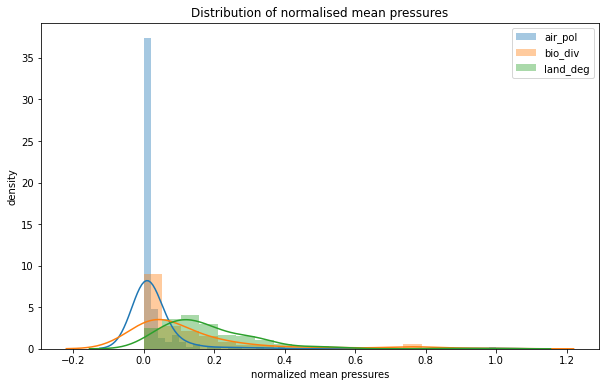

In [16]:
#Minmax scaler
#Normalise the country means and multiply by 5

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
min_max_arr=scaling.fit_transform(cn_pr_means[['air_pollution','biodiversity_pct','land_degradation_pct']])
type(min_max_arr)
min_max_arr_df=pd.DataFrame(min_max_arr)
min_max_arr_df

plt.figure(figsize=(10,6))
sns.distplot(min_max_arr_df[0],hist=True, label='air_pol')
sns.distplot(min_max_arr_df[1],hist=True, label = 'bio_div')
sns.distplot(min_max_arr_df[2],hist=True, label='land_deg')
plt.legend()
plt.xlabel("normalized mean pressures")
plt.ylabel("density")
plt.title("Distribution of normalised mean pressures")
plt.show()

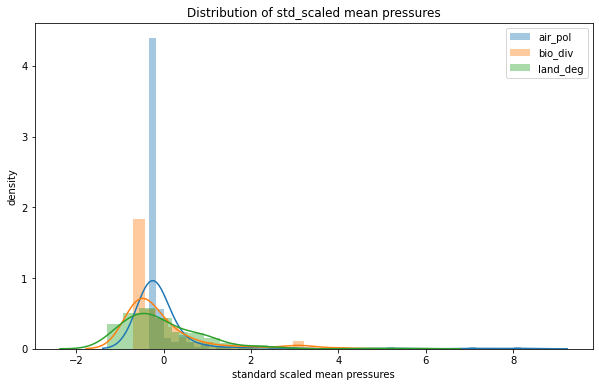

In [17]:
#Standard scaler

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
std_sca_arr=scaling.fit_transform(cn_pr_means[['air_pollution','biodiversity_pct','land_degradation_pct']])
type(std_sca_arr)
std_sca_arr_df=pd.DataFrame(std_sca_arr)
std_sca_arr_df

plt.figure(figsize=(10,6))
sns.distplot(std_sca_arr_df[0],hist=True, label='air_pol')
sns.distplot(std_sca_arr_df[1],hist=True, label = 'bio_div')
sns.distplot(std_sca_arr_df[2],hist=True, label='land_deg')
plt.legend()
plt.xlabel("standard scaled mean pressures")
plt.ylabel("density")
plt.title("Distribution of std_scaled mean pressures")
plt.show()

In [18]:
# min(std_sca_arr_df[2])

In [19]:
##
facility_press_df = pd.read_csv("Facility_pressures.csv", delimiter=";", decimal=',') 
facility_press_df = facility_press_df.loc[:, :'Non-GHG Air Pollution'] #Drop redundant columns
facility_press_df.rename(columns = {'Unnamed: 0':'Facility', 'Unnamed: 1':'latitude', #rename cols
                              'Unnamed: 2':'longitude'}, inplace = True)
facility_press_df=facility_press_df.iloc[1:] #Drop first row which had some col names
facility_press_df=facility_press_df.apply(lambda x: x.str.replace(',','.')) #Convert commas to dots
facility_press_df.columns=facility_press_df.columns.str.replace(' ','_') #Rename columns to remove blank space
facility_press_df[facility_press_df.columns[1:]]=facility_press_df[facility_press_df.columns[1:]].apply(pd.to_numeric, axis = 1)

facility_press_df.dropna(how='all',inplace=True) #Drop rows which have missing values 

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(facility_press_df)


In [20]:
#Get countries from lat-lon
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

def latlon2cnt(df):
    df['Country']=" "
    
    for ind,row in df.iterrows(): 
        lat=str(row['latitude'])
        lon=str(row['longitude'])
#         print(lat,lon)
        try:
            location = geolocator.reverse(lat+","+lon, language='en')
            address = location.raw['address']
#             print(address)
            country = address.get('country', '')
        except:
            pass
        df.at[ind,'Country'] = country.split('/')[0]
#         print(country)
#         print(country.split('/')[0])
    return df

# latlon2cnt(facility_press_df) #For debugging
facility_press_df = latlon2cnt(facility_press_df)
facility_press_df



,Facility,latitude,longitude,Land_Degradation,Biodiversity,Water_Pollution,Water_Stress,Non-GHG_Air_Pollution,Country
1,1,36.638880,2.768450,0.309,0.047,2.015,1.923,0.005,Algeria
2,2,35.697049,51.016755,0.000,0.000,0.000,0.000,0.000,Iran
3,3,47.093820,5.488840,0.454,0.016,2.278,1.911,0.006,France
4,4,30.044388,31.235726,0.242,0.076,1.851,1.642,0.003,Egypt
5,5,43.004436,-1.688364,0.274,0.003,1.712,2.787,0.005,Spain
6,6,48.154358,-0.404645,0.015,0.000,0.063,0.054,0.000,France
7,7,43.316166,-0.403432,0.401,0.021,2.197,1.727,0.005,France
8,8,48.150782,-0.649127,0.000,0.000,0.000,0.000,0.000,France
9,9,49.017883,0.138381,0.000,0.000,0.000,0.000,0.000,France
10,10,53.261048,20.897863,0.622,0.038,1.985,2.164,0.005,Poland


In [21]:
# Iran (Islamic Republic of)

facility_press_df["Country"]= facility_press_df["Country"].replace("United States", "United States of America (the)")

facility_press_df['Country'][2] = "Iran (Islamic Republic of)"
facility_press_df

,Facility,latitude,longitude,Land_Degradation,Biodiversity,Water_Pollution,Water_Stress,Non-GHG_Air_Pollution,Country
1,1,36.638880,2.768450,0.309,0.047,2.015,1.923,0.005,Algeria
2,2,35.697049,51.016755,0.000,0.000,0.000,0.000,0.000,Iran (Islamic Republic of)
3,3,47.093820,5.488840,0.454,0.016,2.278,1.911,0.006,France
4,4,30.044388,31.235726,0.242,0.076,1.851,1.642,0.003,Egypt
5,5,43.004436,-1.688364,0.274,0.003,1.712,2.787,0.005,Spain
6,6,48.154358,-0.404645,0.015,0.000,0.063,0.054,0.000,France
7,7,43.316166,-0.403432,0.401,0.021,2.197,1.727,0.005,France
8,8,48.150782,-0.649127,0.000,0.000,0.000,0.000,0.000,France
9,9,49.017883,0.138381,0.000,0.000,0.000,0.000,0.000,France
10,10,53.261048,20.897863,0.622,0.038,1.985,2.164,0.005,Poland


In [22]:
# Join associated country risk with the faciity table
cnt_ind_df = pd.merge(cn_ap, cn_bd, on='reporter_name', how='outer') #186*3
cnt_ind_df = pd.merge(cnt_ind_df, cn_ld, on='reporter_name', how='outer') #
# cnt_ind_df
cnt_ind_df.rename(columns={"reporter_name": "Country"},inplace=True)
cnt_ind_df
facility_press_df_ind= pd.merge(facility_press_df, cnt_ind_df, on='Country', how='left')
facility_press_df_ind=facility_press_df_ind[['Facility','latitude','longitude','Country','Non-GHG_Air_Pollution',
                                            'ap_risk_class','Biodiversity','bd_risk_class','Land_Degradation','ld_risk_class']]

facility_press_df_ind[:15]

,Facility,latitude,longitude,Country,Non-GHG_Air_Pollution,ap_risk_class,Biodiversity,bd_risk_class,Land_Degradation,ld_risk_class
0,1,36.638880,2.768450,Algeria,0.005,1,0.047,1,0.309,1
1,2,35.697049,51.016755,Iran (Islamic Republic of),0.000,3,0.000,3,0.000,3
2,3,47.093820,5.488840,France,0.006,3,0.016,2,0.454,3
3,4,30.044388,31.235726,Egypt,0.003,3,0.076,3,0.242,3
4,5,43.004436,-1.688364,Spain,0.005,3,0.003,1,0.274,3
5,6,48.154358,-0.404645,France,0.000,3,0.000,2,0.015,3
6,7,43.316166,-0.403432,France,0.005,3,0.021,2,0.401,3
7,8,48.150782,-0.649127,France,0.000,3,0.000,2,0.000,3
8,9,49.017883,0.138381,France,0.000,3,0.000,2,0.000,3
9,10,53.261048,20.897863,Poland,0.005,3,0.038,1,0.622,1


In [23]:
facility_press_df_ind[15:]

,Facility,latitude,longitude,Country,Non-GHG_Air_Pollution,ap_risk_class,Biodiversity,bd_risk_class,Land_Degradation,ld_risk_class
15,16,35.767270,-5.799750,Morocco,0.004,1,0.083,1,0.233,4
16,17,44.311461,-96.798440,United States of America (the),0.000,3,0.000,1,0.000,3
17,18,37.484072,-86.285656,United States of America (the),0.002,3,0.312,1,0.108,3
18,19,44.287506,-88.311648,United States of America (the),0.002,3,0.317,1,0.109,3
19,20,47.795207,1.063929,France,0.006,3,0.018,2,0.624,3
20,21,1.587706,108.340589,Indonesia,0.002,4,0.107,3,0.020,3
21,22,41.114126,27.751715,Turkey,0.005,3,0.110,3,0.319,3
22,23,50.012241,3.700456,France,0.000,3,0.000,2,0.000,3
23,24,49.385225,-1.342885,France,0.000,3,0.001,2,0.016,3
24,25,43.589657,-116.563509,United States of America (the),0.000,3,0.000,1,0.000,3
